# Problem 1

Airline_Setiments values are replaced with -1, 0 & 1 for Negatve , Netural & Postive sentiment in data respectively.

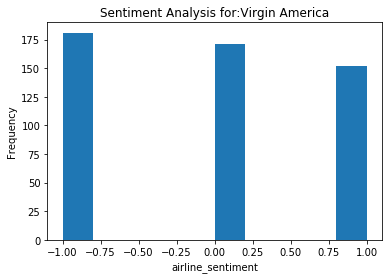

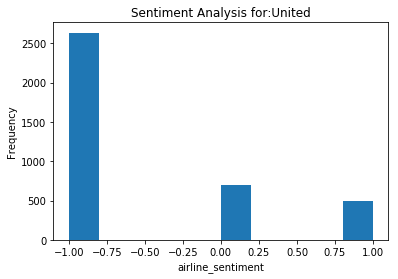

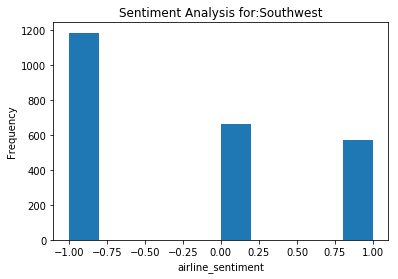

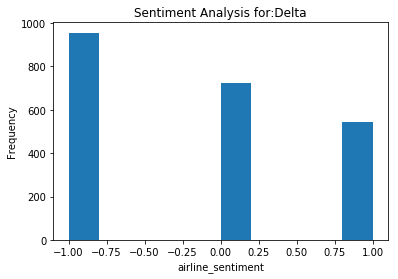

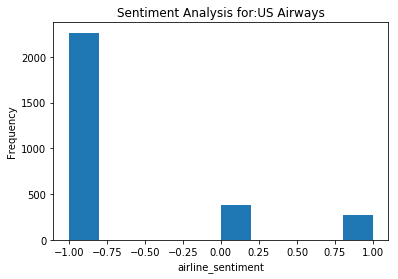

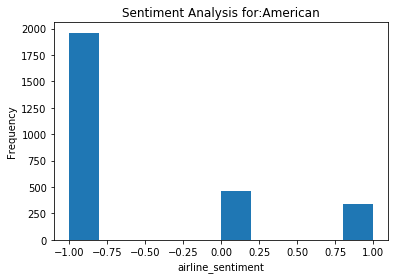

In [3]:
import os 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
os.chdir('C:/1_Jasbir/UIC_Local/Spring 2018/Text_Analytics/Assignment_2/')
df = pd.read_csv("Tweets.csv", header=0, delimiter=',', quoting=0)


df.replace(to_replace=dict(neutral=0,positive=1,negative=-1), inplace=True)

ar_airlines=df.airline.unique()

for x in ar_airlines:
    df_new=df[df['airline'] == x]
    df_new['airline_sentiment'].plot.hist()
    plt.xlabel('airline_sentiment')
    plt.title('Sentiment Analysis for:'+ x)
    plt.show()

# Problem 2

In [4]:

import re
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np


#Replace Url's
df['text'].replace(to_replace='http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', value='url', regex=True, inplace=True)

#Replace Hastag
df['text'].replace(to_replace='(?<=^|(?<=[^a-zA-Z0-9-_\.]))hashtag_([A-Za-z]+[A-Za-z0-9]+)', value='hashtag_', regex=True, inplace=True)

#Replace Mentions
df['text'].replace(to_replace='(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9]+)', value='', regex=True, inplace=True)

df['text']



0                                              What  said.
1         plus you've added commercials to the experien...
2         I didn't today... Must mean I need to take an...
3         it's really aggressive to blast obnoxious "en...
4                 and it's a really big bad thing about it
5         seriously would pay $30 a flight for seats th...
6         yes, nearly every time I fly VX this “ear wor...
7         Really missed a prime opportunity for Men Wit...
8                         Well, I didn't…but NOW I DO! :-D
9         it was amazing, and arrived an hour early. Yo...
10        did you know that suicide is the second leadi...
11        I &lt;3 pretty graphics. so much better than ...
12        This is such a great deal! Already thinking a...
13         I'm flying your #fabulous #Seductive skies a...
14                                                 Thanks!
15                          SFO-PDX schedule is still MIA.
16        So excited for my first cross country flight .

# Problem 3

Out of all the classifiers , model is acuurately and robustley predicted 79% of the time correct airline sentiment for given tweet in case of American airline 

Least was 43% for Virgin American

In this scenerio accuracy is almost same as F1 score .
As accuracy is just the ratio of total true postives & negatives which is not the viable statistics to evaluate the model performnace deoending upon the requirment of the anlaysis in hand .

In here we want to predict the customer satisfaction , so even cases with FP & FN also matters .


In [12]:
from sklearn.model_selection import KFold
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics  import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

ls_airline=[]
kf = KFold(n_splits=10)
ar_airlines=df.airline.unique()
for x in ar_airlines:
    df_airline=df[df['airline']==x]
    for train, valid in kf.split(df_airline['airline_sentiment']):
        df_airline.index=range(len(df_airline))
        X_train_text = df_airline['text'][train]
        y_train = df_airline['airline_sentiment'][train]
        X_valid_text = df_airline['text'][valid]
        y_valid = df_airline['airline_sentiment'][valid]
        vect = TfidfVectorizer(min_df = .0005)

        X_train = vect.fit_transform(X_train_text)
        X_valid = vect.transform(X_valid_text)

        LR = LogisticRegression(C = 5)
        LR.fit(X_train, y_train)

        p_valid = LR.predict(X_valid)
    y=f1_score(y_valid, p_valid,average='weighted')
    print("F1 Score  for %(n)s is %(s)s" % {'n': x, 's': y})
    z=accuracy_score(y_valid,p_valid)
    print("Accuracy Score  for %(n)s is %(s)s" % {'n': x, 's': z})
    
                      

F1 Score  for Virgin America is 0.438679163034
Accuracy Score  for Virgin America is 0.44
F1 Score  for United is 0.709078488835
Accuracy Score  for United is 0.738219895288
F1 Score  for Southwest is 0.770953382634
Accuracy Score  for Southwest is 0.776859504132
F1 Score  for Delta is 0.695480900375
Accuracy Score  for Delta is 0.702702702703
F1 Score  for US Airways is 0.772840174376
Accuracy Score  for US Airways is 0.810996563574
F1 Score  for American is 0.793318237318
Accuracy Score  for American is 0.832727272727


# Problem 4

There is slight decrease in F! score and increase in accuracy for all the airlines 

we should prefer logistics regression classifier.

In [19]:
from sklearn.model_selection import KFold
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics  import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

ls_airline=[]
kf = KFold(n_splits=10)
ar_airlines=df.airline.unique()
for x in ar_airlines:
    df_airline=df[df['airline']==x]
    for train, valid in kf.split(df_airline['airline_sentiment']):
        df_airline.index=range(len(df_airline))
        X_train_text = df_airline['text'][train]
        y_train = df_airline['airline_sentiment'][train]
        X_valid_text = df_airline['text'][valid]
        y_valid = df_airline['airline_sentiment'][valid]
        vect = TfidfVectorizer(min_df = .0005)

        X_train = vect.fit_transform(X_train_text)
        X_valid = vect.transform(X_valid_text)

        NB = MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)
        NB.fit(X_train, y_train)

        p_valid = NB.predict(X_valid)
    y=f1_score(y_valid, p_valid,average='weighted')
    print("F1 Score  for %(n)s is %(s)s" % {'n': x, 's': y})
    z=accuracy_score(y_valid,p_valid)
    print("Accuracy Score  for %(n)s is %(s)s" % {'n': x, 's': z})
    
                      

F1 Score  for Virgin America is 0.38475169114
Accuracy Score  for Virgin America is 0.38
F1 Score  for United is 0.655449125658
Accuracy Score  for United is 0.725130890052
F1 Score  for Southwest is 0.72080626883
Accuracy Score  for Southwest is 0.735537190083
F1 Score  for Delta is 0.667652442531
Accuracy Score  for Delta is 0.68018018018
F1 Score  for US Airways is 0.741130206998
Accuracy Score  for US Airways is 0.797250859107
F1 Score  for American is 0.751701126901
Accuracy Score  for American is 0.810909090909


# Problem 5

Out of Naive Bayes and Logistic regression , LR perfroms better when considering F!_score and accuracy for all the airline taken togather.

In [47]:
from sklearn.model_selection import KFold
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics  import accuracy_score, f1_score

kf = KFold(n_splits=10)
df_airline=df[df['airline']==x]
for train, valid in kf.split(df['airline_sentiment']):
    X_train_text = df['text'][train]
    y_train = df['airline_sentiment'][train]
    X_valid_text = df['text'][valid]
    y_valid = df['airline_sentiment'][valid]
    vect = TfidfVectorizer(min_df = .0005)

    X_train = vect.fit_transform(X_train_text)
    X_valid = vect.transform(X_valid_text)

    NB = MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)
    NB.fit(X_train, y_train)

    p_valid1 = NB.predict(X_valid)
    
    LR = LogisticRegression(C = 5)
    LR.fit(X_train, y_train)

    p_valid2 = LR.predict(X_valid)
    
y=f1_score(y_valid, p_valid1,average='weighted')
z=accuracy_score(y_valid,p_valid1)  

print('Naive bayes F1 Score :',y)
print('Naive bayes Accuracy :',z)

y=f1_score(y_valid, p_valid2,average='weighted')
z=accuracy_score(y_valid,p_valid2)  

print('Logistic F1 Score :',y)
print('Logistic Accuracy :',z)



Naive bayes F1 Score : 0.806320099047
Naive bayes Accuracy : 0.834016393443
Logistic F1 Score : 0.849649945278
Logistic Accuracy : 0.852459016393


# Problem 6

Learnig curve are almost similar for both naive bayes and Logistic Regression.

From graphs 

    

[[ 0.69929419  0.71789617  0.69978878]
 [ 0.69929419  0.71789617  0.69978878]
 [ 0.69929419  0.71789617  0.69978878]
 [ 0.69929419  0.71789617  0.69978878]
 [ 0.69929419  0.71789617  0.69978878]
 [ 0.69929419  0.71789617  0.69978878]
 [ 0.69929419  0.71789617  0.69978878]
 [ 0.69929419  0.71789617  0.69978878]
 [ 0.69929419  0.71789617  0.69978878]
 [ 0.69929419  0.71789617  0.69978878]
 [ 0.69929419  0.71789617  0.69978878]
 [ 0.69929419  0.71789617  0.69978878]
 [ 0.69929419  0.71789617  0.69978878]
 [ 0.69929419  0.71789617  0.69978878]
 [ 0.69929419  0.71789617  0.69978878]
 [ 0.69929419  0.71789617  0.69978878]]


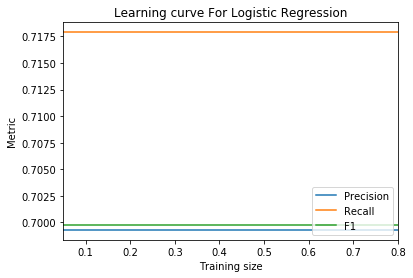

In [97]:
#Logistic Regression
from sklearn.metrics  import accuracy_score
import numpy as np 
#Getting random 20% data
#df_validation = df.sample(frac=0.2, random_state= 100)

scores_LR = []
metrics = [precision_score, recall_score, f1_score]
for i in np.arange(0.05,0.85,0.05):
    df_training=df.sample(frac=i,random_state=100)
    df_validation = df.sample(frac=0.2, random_state= 100)
    
    X_train_text = df_training['text']
    y_train = df_training['airline_sentiment']
    
    X_valid_text = df_validation['text']
    y_valid = df_validation['airline_sentiment']
    
    vect = TfidfVectorizer(min_df = .0005)

    X_train = vect.fit_transform(X_train_text)
    X_valid = vect.transform(X_valid_text)
    
    LR = LogisticRegression(C = 5)
    LR.fit(X_train, y_train)

    p_valid2 = LR.predict(X_valid)
    scores_LR.append([metric(y_valid, p_valid,average='weighted') for metric in metrics])
    #scores_LR.append(accuracy_score(y_valid,p_valid2))

scores_LR=np.array(scores_LR)
print(scores_LR)

%matplotlib inline

size = np.arange(0.05,0.85, 0.05)
plt.title("Learning curve For Logistic Regression")

plt.plot(size, scores_LR[:, 0], label = 'Precision')
plt.plot(size, scores_LR[:, 1], label = 'Recall')
plt.plot(size, scores_LR[:, 2], label = 'F1')

plt.xlabel('Training size')
plt.ylabel('Metric')
plt.xlim(size.min(), size.max())
#plt.ylim(0, 200)
plt.legend(loc = 'lower right')
plt.show()





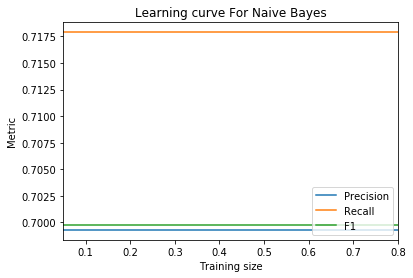

In [96]:
#Multinomial Naive Bayes
scores_log_NB =[]
metrics = [precision_score, recall_score, f1_score]

for i in np.arange(0.05,0.85,0.05):
    df_training=df.sample(frac=i,random_state=100)
    
    X_train_text = df_training['text']
    y_train = df_training['airline_sentiment']
    
    X_valid_text = df_validation['text']
    y_valid = df_validation['airline_sentiment']
    
    vect = TfidfVectorizer(min_df = .0005)

    X_train = vect.fit_transform(X_train_text)
    X_valid = vect.transform(X_valid_text)
    
    NB = MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)
    NB.fit(X_train, y_train)

    p_valid1 = NB.predict(X_valid)
    scores_log_NB.append([metric(y_valid, p_valid,average='weighted') for metric in metrics])
scores_log_NB=np.array(scores_log_NB)

%matplotlib inline

size = np.arange(0.05,0.85, 0.05)
plt.title("Learning curve For Naive Bayes")

plt.plot(size, scores_log_NB[:, 0], label = 'Precision')
plt.plot(size, scores_log_NB[:, 1], label = 'Recall')
plt.plot(size, scores_log_NB[:, 2], label = 'F1')

plt.xlabel('Training size')
plt.ylabel('Metric')
plt.xlim(size.min(), size.max())
#plt.ylim(0, 200)
plt.legend(loc = 'lower right')
plt.show()
